In [100]:
using LightGraphs
using GraphPlot
using Plots
using Clustering
using ColorSchemes
include("../src/deepwalk.jl")

┌ Info: Precompiling ColorSchemes [35d6a980-a343-548e-a6ea-1d62b119f2f4]
└ @ Base loading.jl:1278


embed (generic function with 1 method)

In [123]:
graph = CliqueGraph(5, 20)

{100, 220} undirected simple Int64 graph

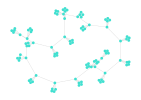

In [125]:
gplot(graph)

In [61]:
model, losses = train_model(graph, num_epochs=200, emb_dim=50)

Epoch 1 - Average loss: 4.609087
Epoch 2 - Average loss: 4.5906944
Epoch 3 - Average loss: 4.574664
Epoch 4 - Average loss: 4.5502334
Epoch 5 - Average loss: 4.5347505
Epoch 6 - Average loss: 4.5135374
Epoch 7 - Average loss: 4.493028
Epoch 8 - Average loss: 4.461394
Epoch 9 - Average loss: 4.4415145
Epoch 10 - Average loss: 4.4035583
Epoch 11 - Average loss: 4.3791013
Epoch 12 - Average loss: 4.351296
Epoch 13 - Average loss: 4.3084764
Epoch 14 - Average loss: 4.270619
Epoch 15 - Average loss: 4.2289033
Epoch 16 - Average loss: 4.1930265
Epoch 17 - Average loss: 4.133007
Epoch 18 - Average loss: 4.0789304
Epoch 19 - Average loss: 4.0376415
Epoch 20 - Average loss: 3.982254
Epoch 21 - Average loss: 3.923223
Epoch 22 - Average loss: 3.848356
Epoch 23 - Average loss: 3.801579
Epoch 24 - Average loss: 3.724217
Epoch 25 - Average loss: 3.6527033
Epoch 26 - Average loss: 3.5864148
Epoch 27 - Average loss: 3.5068402
Epoch 28 - Average loss: 3.432975
Epoch 29 - Average loss: 3.373838
Epoch 30

(Chain(Dense(100, 50), Dense(50, 100)), Any[4.609087f0, 4.5906944f0, 4.574664f0, 4.5502334f0, 4.5347505f0, 4.5135374f0, 4.493028f0, 4.461394f0, 4.4415145f0, 4.4035583f0  …  1.934918f0, 1.9237125f0, 1.9456178f0, 1.8761344f0, 1.8935183f0, 1.9229709f0, 1.866761f0, 1.9484226f0, 1.8868468f0, 1.908743f0])

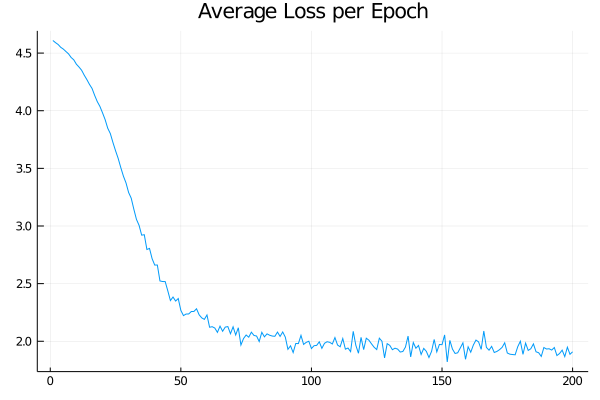

In [62]:
plot(losses, legend=false, title="Average Loss per Epoch")

In [63]:
embeddings = embed(graph, model)
size(embeddings)

(50, 100)

In [128]:
clusters = dbscan(embeddings, 3)
size(clusters)

(19,)

In [118]:
colour_idxs = zeros(Int8, nv(graph))
for (idx, cluster) in enumerate(clusters)
    colour_idxs[cluster.core_indices] .= idx
end
colours = ColorSchemes.gist_rainbow[colour_idxs .* 5]

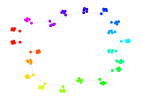

In [119]:
gplot(graph, nodefillc = colours)